In [2]:
class DftDriver(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)
    
    bindto = ['xilinx.com:hls:dft:1.0']
    
    @property
    def x(self):
        return self.read(0x10)
    
    @x.setter
    def x(self, value):
        self.write(0x10, value)

In [17]:
import pynq.lib.dma

dftol = pynq.Overlay("./src/dft/dft.bit")

dma0 = dftol.axi_dma_0
dma1 = dftol.axi_dma_1


from pynq import Xlnk
xlnk = Xlnk()
samplereal = xlnk.cma_array(shape=(256,), dtype=np.float)
sampleimag = xlnk.cma_array(shape=(256,), dtype=np.float)
outreal = xlnk.cma_array(shape=(128,), dtype=np.float)
outimag = xlnk.cma_array(shape=(128,), dtype=np.float)

for i in range(128):
    samplereal[i] = 1
    
# for i in range(64,128):
#     samplereal[i] = 1 


for j in range(128):
    sampleimag[j] = 0
    
dma0.sendchannel.transfer(samplereal)
dma1.sendchannel.transfer(sampleimag)
dma0.recvchannel.transfer(outreal)
dma1.recvchannel.transfer(outimag)
print(outreal)
print(outimag)

[-4.66436218e-35 -3.79919940e-35 -1.17361422e-34 -4.02489431e-35
 -1.22778087e-33 -6.69561914e-35 -6.53010887e-34 -4.73959488e-35
 -1.64005038e-34 -3.58102732e-34 -2.93403523e-34 -2.10648720e-34
 -7.80002052e-33 -1.21423918e-33 -5.77026933e-34 -2.39958919e-32
 -2.68802750e-33 -2.28403361e-33 -9.35280155e-33 -2.72519257e-32
 -3.18741576e-32 -1.65822636e-31 -1.48681860e-31 -1.35277374e-30
 -2.15704263e-30 -4.95996469e-29 -3.38717326e-29 -1.86565674e-28
 -1.09493950e-27 -2.76164605e-26 -2.06472151e-24 -1.92071433e-20
  1.64741389e-20  5.46391642e-24  5.89184546e-26  1.11450283e-26
  1.05312953e-28  6.95775406e-28  2.39024898e-28  5.34453373e-29
  5.26564764e-29  4.46692542e-29  2.16197219e-29  7.18603117e-30
  1.49883599e-29  7.12440141e-30  2.20018264e-29  5.72047525e-29
  4.92113687e-30  3.57760815e-30  1.74412243e-29  1.00629080e-28
  3.50648716e-28  3.20474786e-28  1.14384845e-29  7.83338967e-28
  5.59775769e-27  1.25271129e-27  3.94304291e-26  3.80167904e-26
  1.17049306e-24  1.17840

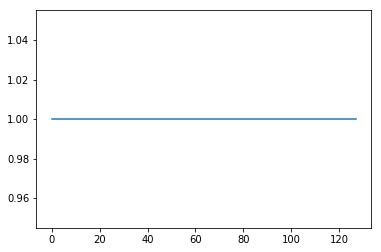

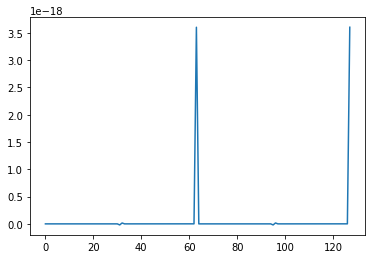

In [19]:
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy.fft

actualreal = samplereal[0:128]
fig1 = plt.figure()
ax1 = fig1.gca()
plt.plot(actualreal)

fig2 = plt.figure()
ax2 = fig2.gca()

plt.plot(outreal)